# ML Intership Task 5

# Instagram Reach Forecasting

## Data Pre-processing

 #### Q.1: Import data and check null values, column info, and descriptive statistics of the data.

In [80]:
import pandas as pd
import numpy as np

data = pd.read_csv("Instagram-Reach.csv")

In [2]:
data.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [3]:
data.tail()

,Date,Instagram reach
360,2023-03-27T00:00:00,15622
361,2023-03-28T00:00:00,18645
362,2023-03-29T00:00:00,41238
363,2023-03-30T00:00:00,50490
364,2023-03-31T00:00:00,22014


In [4]:
# Null values
print("Null values in each column:")
print(data.isnull().sum())

Null values in each column:
Date               0
Instagram reach    0
dtype: int64


In [5]:
# Column info
print("\nData columns information:")
data.info()


Data columns information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [6]:
# Descriptive statistics of the data
print("\nDescriptive statistics of the data:")
print(data.describe())


Descriptive statistics of the data:
       Instagram reach
count       365.000000
mean      50474.712329
std       30051.787552
min        7620.000000
25%       25070.000000
50%       43987.000000
75%       68331.000000
max      161998.000000


#### Q.2: You can convert the Date column into datetime datatype to move forward.

In [7]:
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    print("\nDate column has been converted to datetime datatype.")
else:
    print("\nNo 'Date' column found in the data.")


Date column has been converted to datetime datatype.


In [8]:
data.head()

,Date,Instagram reach
0,2022-04-01,7620
1,2022-04-02,12859
2,2022-04-03,16008
3,2022-04-04,24349
4,2022-04-05,20532


## Analyzing Reach

#### Q.3: Analyze the trend of Instagram reach over time using a line chart

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

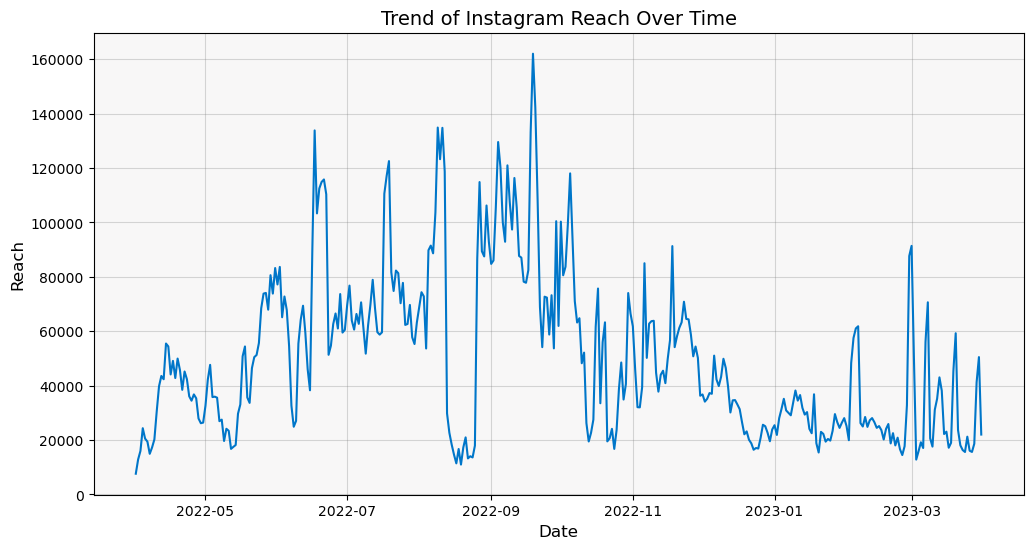

In [48]:
plt.figure(figsize=(12, 6))

plt.gca().set_facecolor('#F8F7F7')
plt.gca().set_axisbelow(True)
plt.grid(True, linestyle='-', color='grey', alpha=0.3)

palette = sns.color_palette(['#0076C9'])

sns.lineplot(data=data, x='Date', y='Instagram reach', color=palette[0])

plt.title('Trend of Instagram Reach Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Reach', fontsize=12)

plt.show()

 #### Q4: Analyze Instagram reach for each day using a bar chart

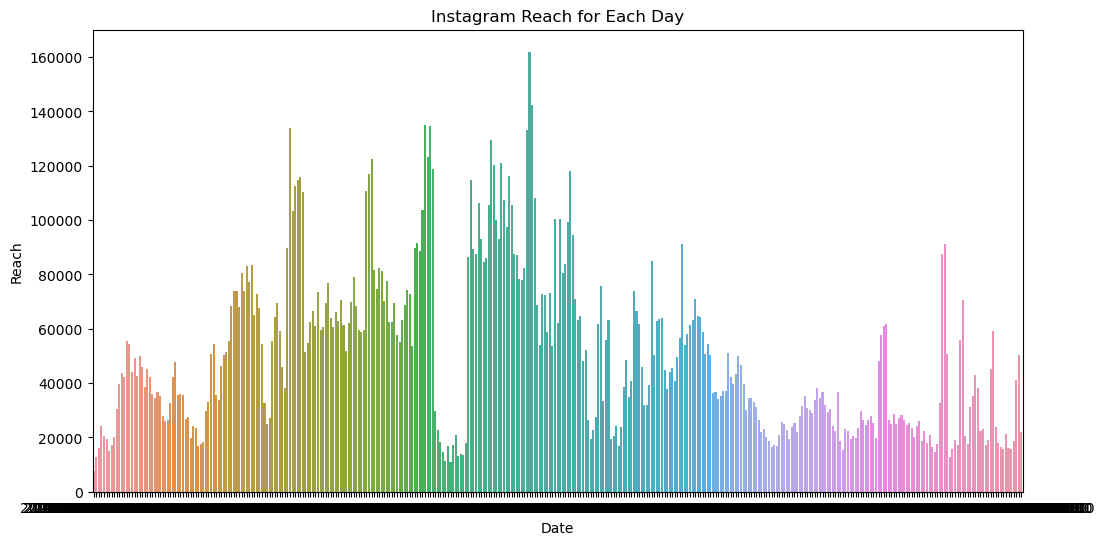

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Date', y='Instagram reach')
plt.title('Instagram Reach for Each Day')
plt.xlabel('Date')
plt.ylabel('Reach')
plt.show()

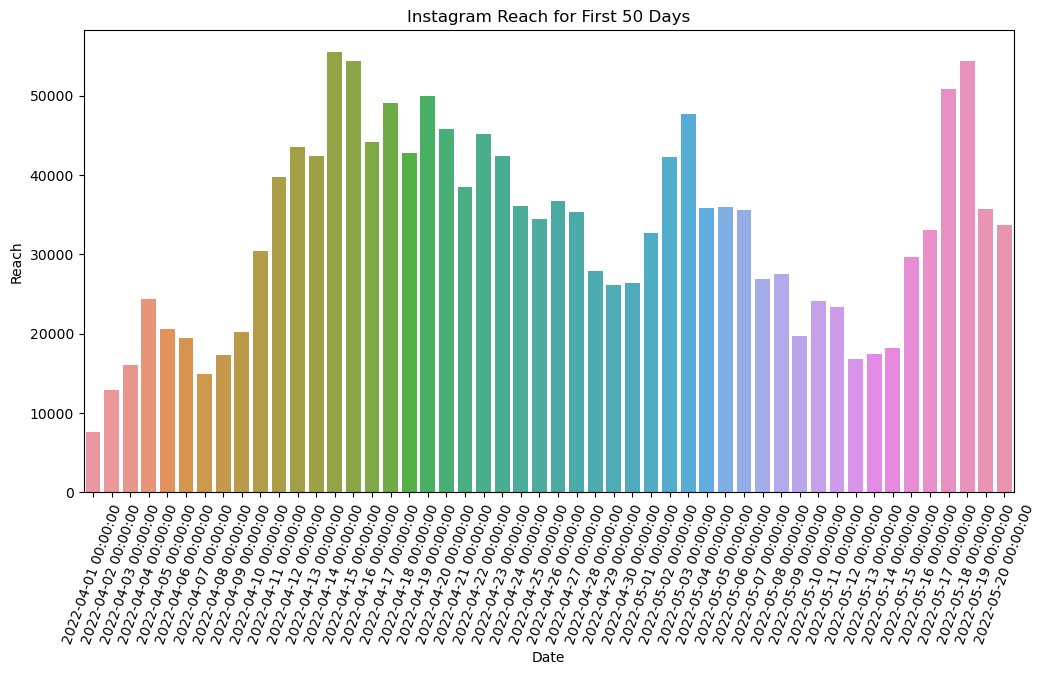

In [57]:
selected_data = data.head(50)
plt.figure(figsize=(12, 6))
sns.barplot(data=selected_data, x='Date', y='Instagram reach')
plt.title('Instagram Reach for First 50 Days')
plt.xlabel('Date')
plt.ylabel('Reach')
plt.xticks(rotation=70)
plt.show()

#### Q5: Analyze the distribution of Instagram reach using a box plot

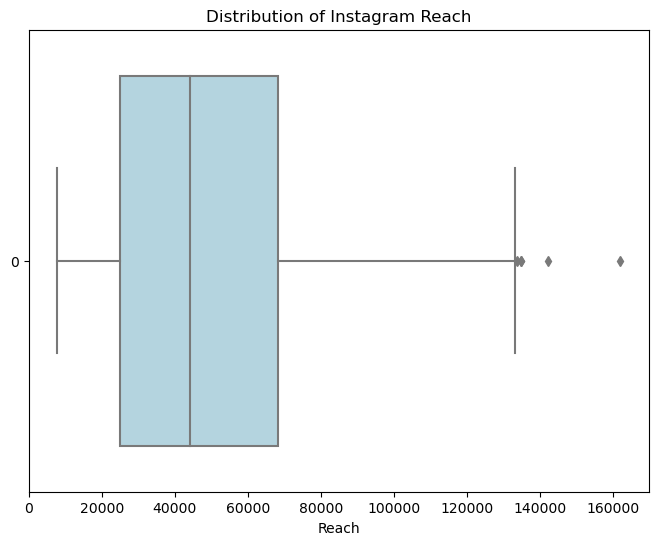

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['Instagram reach'], orient='h', color='lightblue')
plt.title('Distribution of Instagram Reach')
plt.xlabel('Reach')
plt.show()

#### Q.6: Now create a day column and analyze reach based on the days of the week. To create a day column, you can use the python method to extract the day of the week from the Date column.

In [81]:
data.columns

Index(['Date', 'Instagram reach'], dtype='object')

In [83]:
# Convert 'Date' column to datetime if it exists and isn't already datetime
if 'Date' in data.columns:
    if not pd.api.types.is_datetime64_any_dtype(data['Date']):
        data['Date'] = pd.to_datetime(data['Date'])

    # Create a new column 'Day' based on the day name extracted from 'Date' column
    data['Day'] = data['Date'].dt.day_name()

In [84]:
data.columns

Index(['Date', 'Instagram reach', 'Day'], dtype='object')

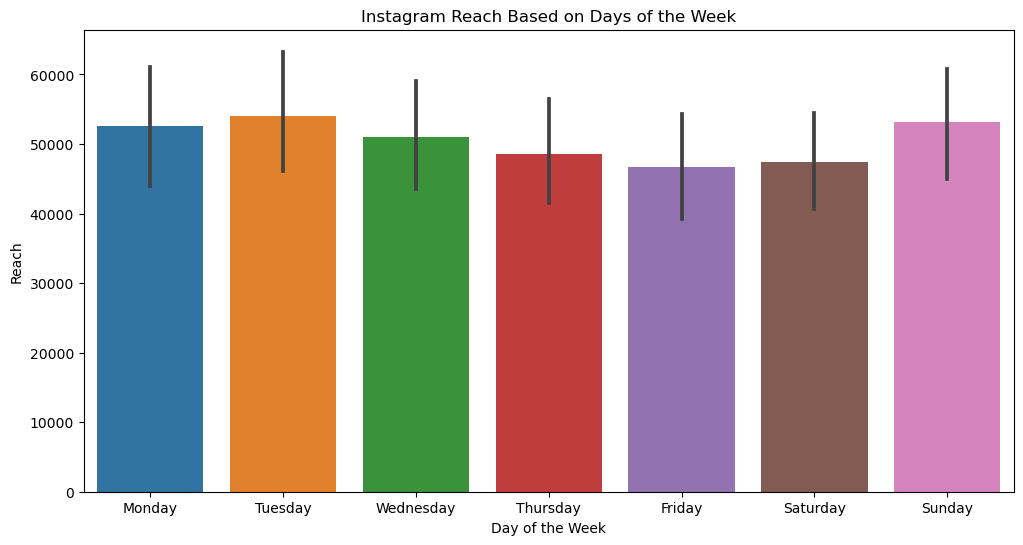

In [85]:
# Analyze reach based on the days of the week using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Day', y='Instagram reach', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Instagram Reach Based on Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Reach')
plt.show()

#### Q.6: Now analyze the reach based on the days of the week. For this, you can group the DataFrame by the Day column and calculate the mean, median, and standard deviation of the Instagram reach column for each day.

In [86]:
# Group by 'Day' column and calculate mean, median, and standard deviation of 'Reach' for each day
grouped_data = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).sort_index()

# Print the result
print("Instagram Reach Analysis Based on Days of the Week:")
print(grouped_data)

Instagram Reach Analysis Based on Days of the Week:
                   mean   median           std
Day                                           
Friday     46666.849057  35574.0  29856.943036
Monday     52621.692308  46853.0  32296.071347
Saturday   47374.750000  40012.0  27667.043634
Sunday     53114.173077  47797.0  30906.162384
Thursday   48570.923077  39150.0  28623.220625
Tuesday    54030.557692  48786.0  32503.726482
Wednesday  51017.269231  42320.5  29047.869685


#### Q.7: Now create a bar chart to visualize the reach for each day of the week.

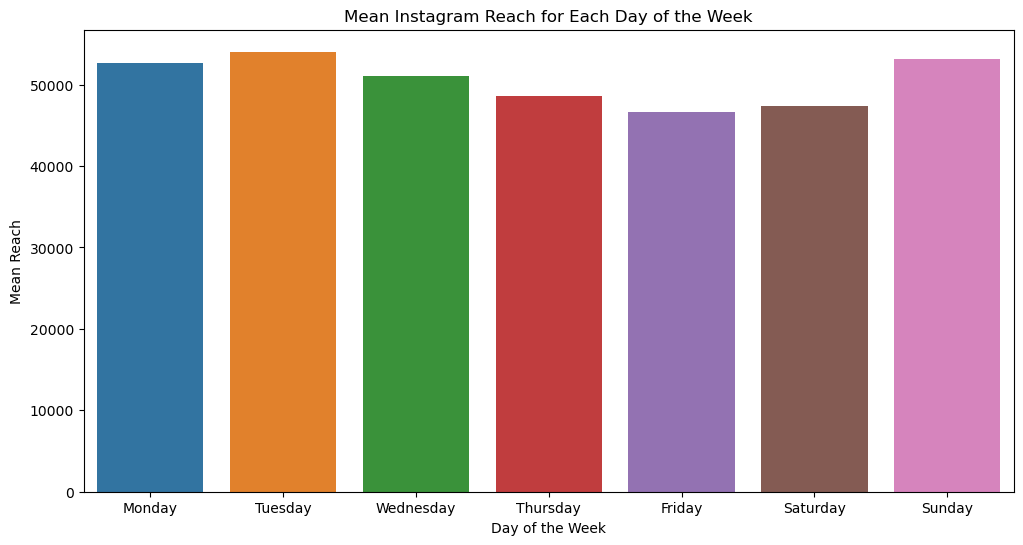

In [87]:
# Group data by 'Day' column and calculate the mean of 'Reach' for each day
mean_reach_per_day = data.groupby('Day')['Instagram reach'].mean()

# Sort days of the week in the order from Monday to Sunday
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_reach_per_day = mean_reach_per_day.loc[days_of_week_order]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_reach_per_day.index, y=mean_reach_per_day.values)
plt.title('Mean Instagram Reach for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Reach')
plt.show()

## To forecast reach, you can use Time Series Forecasting

#### Q.8: Check the Trends and Seasonal patterns of Instagram reach.

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [89]:
data

,Date,Instagram reach,Day
0,2022-04-01,7620,Friday
1,2022-04-02,12859,Saturday
2,2022-04-03,16008,Sunday
3,2022-04-04,24349,Monday
4,2022-04-05,20532,Tuesday
...,...,...,...
360,2023-03-27,15622,Monday
361,2023-03-28,18645,Tuesday
362,2023-03-29,41238,Wednesday
363,2023-03-30,50490,Thursday


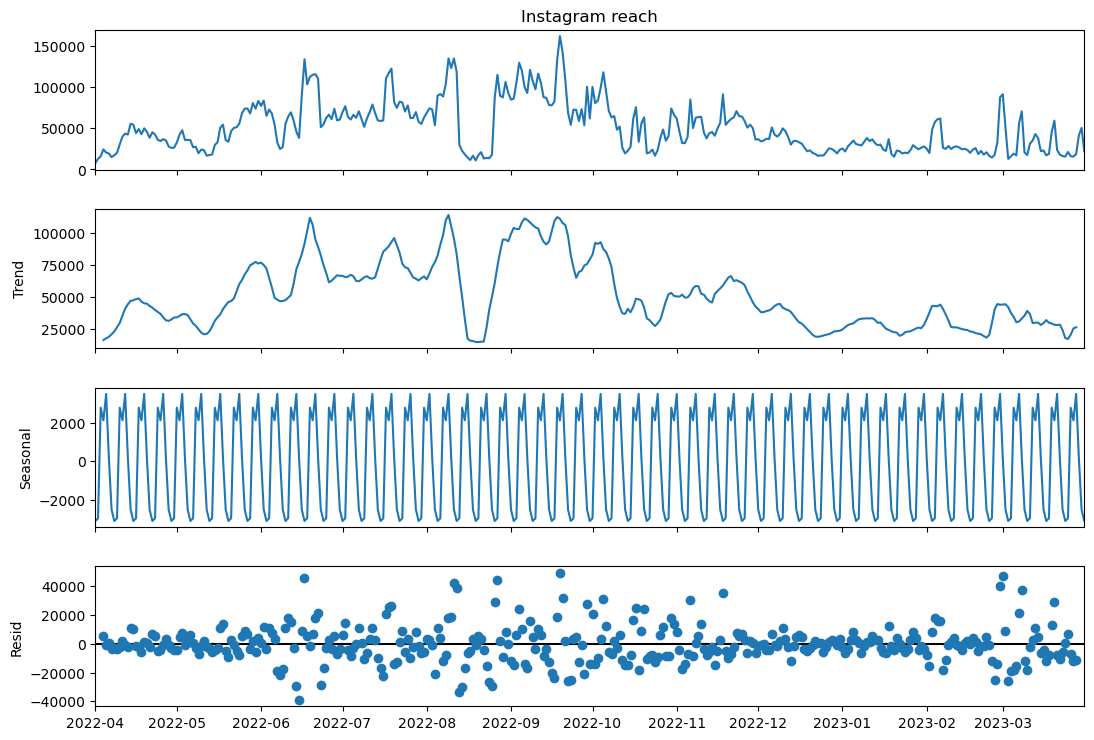

In [90]:
# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Resample data to daily frequency and calculate mean reach for each day
daily_reach = data['Instagram reach'].resample('D').mean()

# Perform time series decomposition
decomposition = seasonal_decompose(daily_reach, model='additive')

# Plotting the decomposition
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

## SARIMA MODEL
## FORMULA USED:
<div style="text-align: center;">
    <img src="Timeseriesforecast(SARIMA) formula.png" alt="SARIMA MODEL">
</div>

#### Q.9: You can use the SARIMA model to forecast the reach of the Instagram account. You need to find p, d, and q values to forecast the reach of Instagram. To find the value of p, you can use the autocorrelation plot, and to find the value of q, you can use a partial autocorrelation plot. The value of d will be 1. You have to visualize an autocorrelation plot to find the value of p, partial autocorrelation plot to find the value of q

In time series forecasting, the SARIMA (Seasonal Autoregressive Integrated Moving Average) model is a commonly used model that combines autoregressive (AR), integrated (I), and moving average (MA) terms with seasonal components. To use the SARIMA model for forecasting Instagram reach, you need to identify appropriate values for the AR (p), MA (q), and integration (d) terms, as well as the seasonal components (P, D, Q, and s).

In your instructions, you are given:

1. The integration term (d) is already provided as 1.
2. You need to determine p using the autocorrelation plot (ACF). ---- ORDER OF AR TERM
3. You need to determine q using the partial autocorrelation plot (PACF) ---- ORDER OF MA TERM

In [96]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

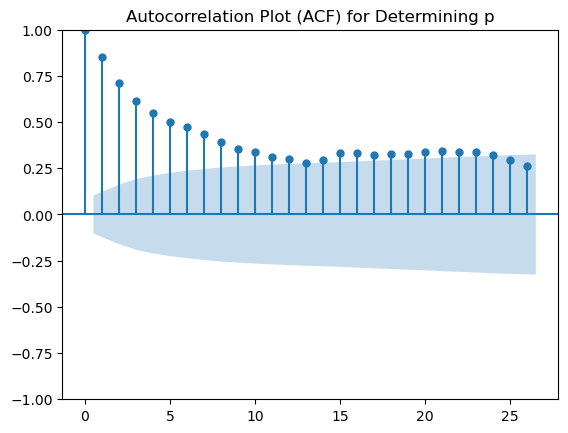

In [97]:
# Drop missing values
daily_reach = daily_reach.dropna()

# Determine p, d, and q values for SARIMA model
# d is provided as 1
d = 1

# Plot autocorrelation function (ACF) for determining the value of p
plot_acf(daily_reach)
plt.title('Autocorrelation Plot (ACF) for Determining p')
plt.show()

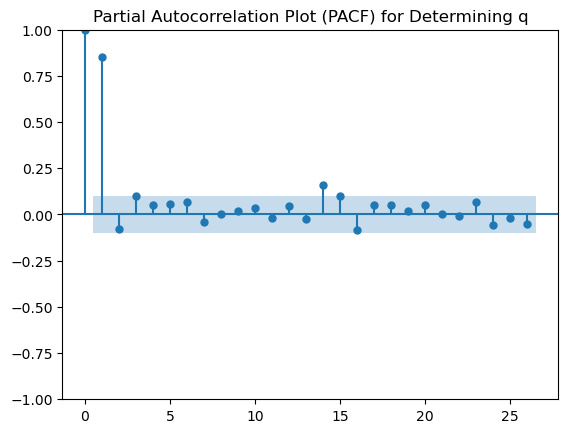

In [98]:
# Plot partial autocorrelation function (PACF) for determining the value of q
plot_pacf(daily_reach)
plt.title('Partial Autocorrelation Plot (PACF) for Determining q')
plt.show()

<Figure size 1200x600 with 0 Axes>

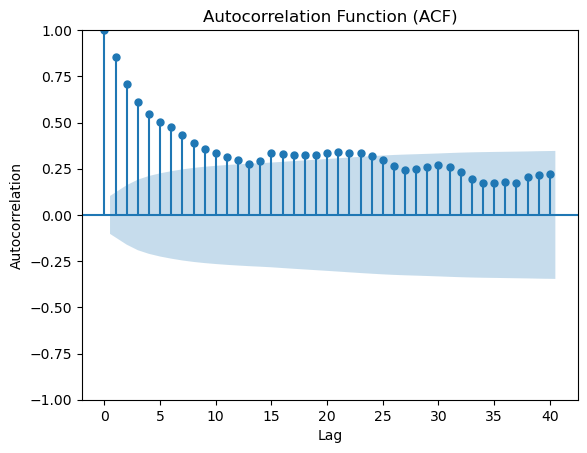

In [101]:
# Plot the ACF
import statsmodels.api as sm
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(daily_reach, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 1200x600 with 0 Axes>

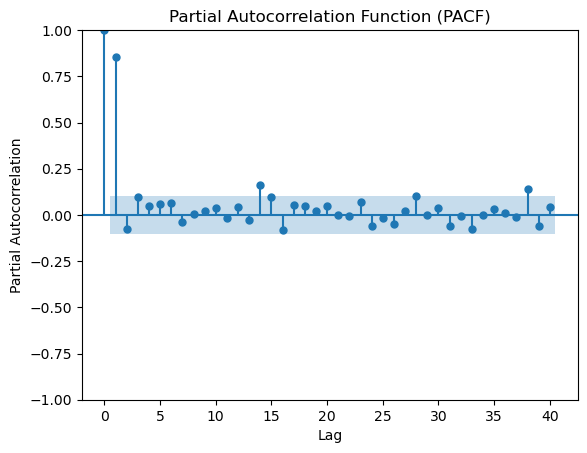

In [102]:
# Plot the PACF
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(daily_reach, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

                                      SARIMAX Results                                      
Dep. Variable:                     Instagram reach   No. Observations:                  365
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 7)   Log Likelihood               -4001.403
Date:                             Wed, 08 May 2024   AIC                           8010.805
Time:                                     19:33:12   BIC                           8026.316
Sample:                                 04-01-2022   HQIC                          8016.975
                                      - 03-31-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0119      0.075      0.159      0.874      -0.135       0.158
ar.L2         -0.1822      

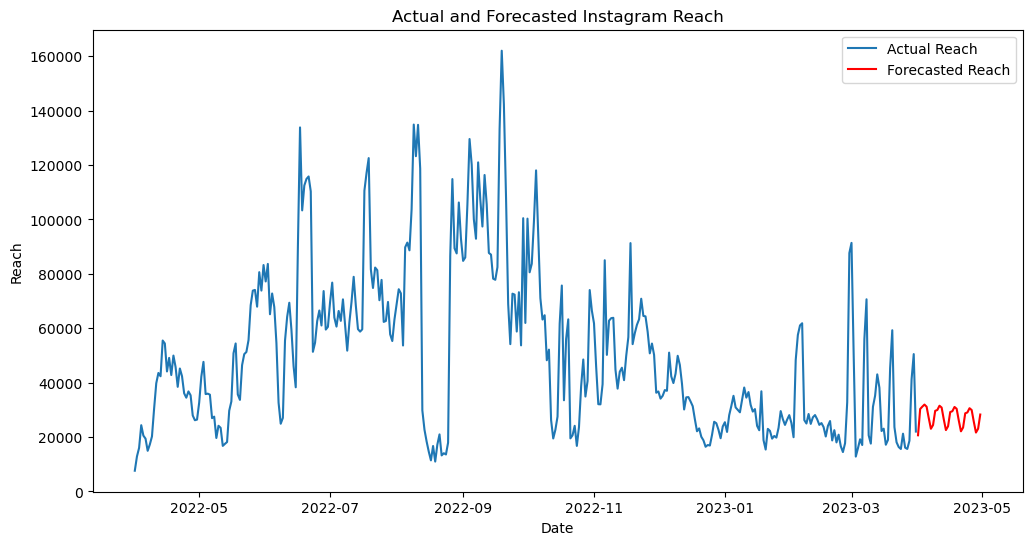

In [106]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Drop missing values
daily_reach = daily_reach.dropna()

# Parameters for the SARIMA model
#(p, d, q) = (2, 1, 0)
#(P, D, Q, s) = (0, 1, 1, 12)
# Non-seasonal components: p, d, q
p = 2  # Order of AR term
d = 1  # Differencing order
q = 0  # Order of MA term

# Seasonal components: P, D, Q, s
P = 0  # Seasonal AR term
D = 1  # Seasonal differencing order
Q = 1  # Seasonal MA term
s = 7  # Seasonality (7 for weakly seasonality)

# Train the SARIMA model
model = SARIMAX(daily_reach, order=(p, d, q), seasonal_order=(P, D, Q, s))

# Fit the model
model_fit = model.fit(disp=False)

# Print model summary
print(model_fit.summary())

# Make predictions for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the actual and forecasted reach
plt.figure(figsize=(12, 6))
plt.plot(daily_reach, label='Actual Reach')
plt.plot(forecast.index, forecast, label='Forecasted Reach', color='red')
plt.title('Actual and Forecasted Instagram Reach')
plt.xlabel('Date')
plt.ylabel('Reach')
plt.legend()
plt.show()